# G2M insight for Cab Investment firm
## Student name: alassirifatima@gmail.com
## Fatimah Asiri 

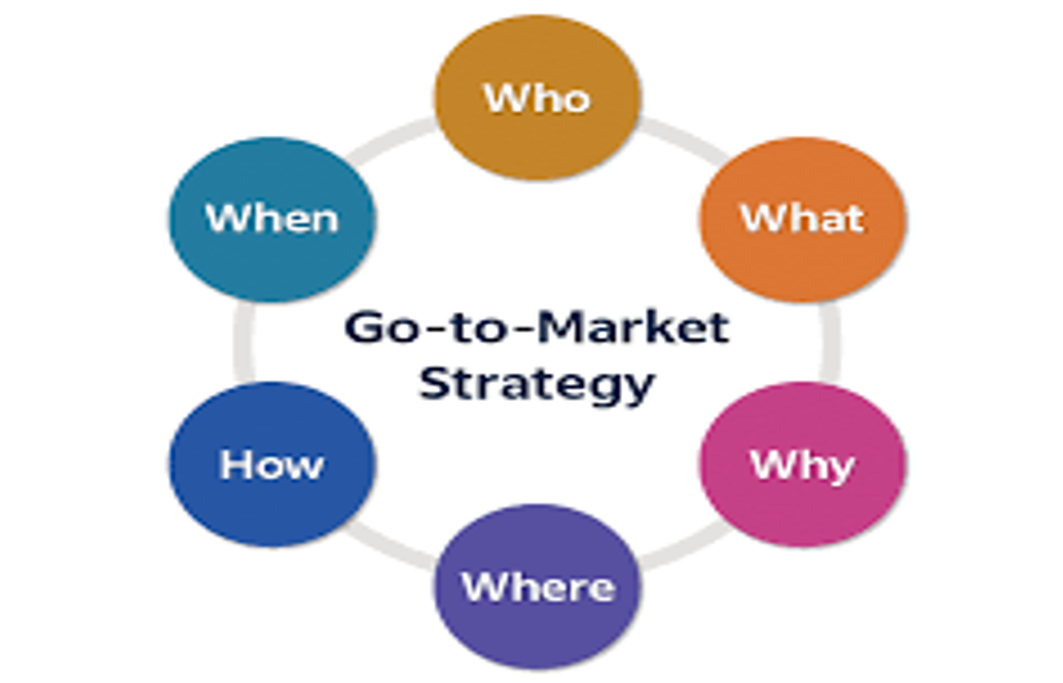

## The Clinet
- XYZ is a private firm in US.
- Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Project Objective
- To invest in Cab industry and as per the private firm's Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Data Set:
- Here is provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

1. Cab_Data.csv – this file includes details of transaction for 2 cab companies
2. Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details
3. Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
4. City.csv – this file contains list of US cities, their population and number of cab users

## The Goals
- Compare Yellow Cab and Pink Cab from Different Aspects:
  1. Compare between Yellow Cab and pink Cab by performance.
  2. Which Cab firm bigger market share?
  3. Which Cab firm profit is increased?
  4. Which Cab firm is favored by customers?
  5. Which Cab firm in most cities?
 

## Import libraries

In [127]:
# Work with datasets
import pandas as pd
import numpy as np
# For plot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Load Datasets:
### Review the Source Documentation


In [128]:
Cab_df = pd.read_csv('Cab_Data.csv')

In [129]:
City_df = pd.read_csv('City.csv')

In [130]:
Customer_df = pd.read_csv('Customer_ID.csv')

In [131]:
Transaction_df = pd.read_csv('Transaction_ID.csv')

### Understand the field names and data types
 1. Cab Dataset Analysis
 2. City Dataset Analysis
 3. Customer Dataset Analysis
 4. Transaction Dataset Analysis

### Here I used some functions to can understand each of the datasets
 1. df.head() 
 2. df.dtypes 
 3. df.info()
 4. df.shape 
 5. df.isna().sum() 
 6. df.describe()
 7. df.columns()
 8. df.nunique()
 9. df.nunique()
 10. df['column_name'].unique()

#### 1. Cab Dataset Analysis

##### Change format Date of Travel column 
  1. import datetime and timedelta from daratime library.
  2. Define function to change date format.
  3. spilt Date of Travel Column to 3 Columns (Year)(Month)(Day).

In [132]:
from datetime import datetime, timedelta

In [133]:
# Create Function change_date_format for change date format
def change_date_format(n):
    date_string =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date =  datetime.strptime(date_string, "%d-%m-%Y")
    return date

In [134]:

Cab_df['Date of Travel']=Cab_df['Date of Travel'].apply(lambda x:change_date_format(x))

In [135]:
# Create Year Column 
Cab_df['Year'] = Cab_df['Date of Travel'].dt.year
# Create Month Column
Cab_df['Month'] = pd.DatetimeIndex(Cab_df['Date of Travel']).month
# Create Day Column
Cab_df['Day'] = pd.DatetimeIndex(Cab_df['Date of Travel']).day
# head function to see Frist Five columns from dataset 
Cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,7
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,5
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,1
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,6
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,2


In [136]:
# dtypes function to know the data type for columns 
Cab_df.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
Year                       int64
Month                      int64
Day                        int64
dtype: object

In [137]:
# info function to know how many values (non-null) in each column
Cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Year            359392 non-null  int64         
 8   Month           359392 non-null  int64         
 9   Day             359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 27.4+ MB


In [138]:
# Get how many (Rows,Colums) in dataset
Cab_df.shape

(359392, 10)

In [139]:
# To see number of missing value in each column.
Cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Year              0
Month             0
Day               0
dtype: int64

In [140]:
# used for calculating some statistical data 
Cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,2017.041693,7.509243,15.641700
std,1.268058e+05,12.233526,274.378911,157.993661,0.801378,3.428929,8.838986
min,1.000001e+07,1.900000,15.600000,19.000000,2016.000000,1.000000,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2016.000000,5.000000,8.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,2017.000000,8.000000,16.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,2018.000000,11.000000,23.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,2018.000000,12.000000,31.000000


In [141]:
# To Know what is the columns names?
Cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Year', 'Month', 'Day'],
      dtype='object')

In [142]:
# To Show how many unique value in each column
Cab_df.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
Year                   3
Month                 12
Day                   31
dtype: int64

In [143]:
# What is the unique values in Company column
Cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [144]:
# What is the unique values in City column
Cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [145]:
# What is the unique values in Year column
Cab_df['Year'].unique()

array([2016, 2017, 2018], dtype=int64)

In [146]:
# What is the unique values in Month column
Cab_df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

#### Summary about Cab Dataset
 - This Dataset has 8 columns and 359392 rows.
 - The Columns [Transaction ID,Date of Trave, Company, City, KM Travelled, Price Charged, Cost of Trip, Year, Month, Day]
 - Three datatypes for columns (float64, int64, object).
 - No missing data.

####  2. City Dataset Analysis

In [147]:
# head function to see Frist Five columns from dataset 
City_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [148]:
# dtypes function to know the data type for columns 
City_df.dtypes

City          object
Population    object
Users         object
dtype: object

In [149]:
# info function to know how many values (non-null) in each column
City_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


- Change Data type for Users Columns

In [150]:
City_df['Users'] = City_df['Users'].apply(lambda x: int(x.split()[0].replace(',', '')))

- Change Data type for Population Columns

In [151]:
City_df['Population'] = City_df['Population'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [152]:
#Check on the datatypes after change
City_df.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [153]:
# Get how many (Rows,Colums) in dataset
City_df.shape

(20, 3)

In [154]:
# To see number of missing value in each column.
City_df.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [155]:
# used for calculating some statistical data 
City_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [156]:
# To Know what is the columns names?
City_df.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [157]:
# To Show how many unique value in each column
City_df.nunique()

City          20
Population    20
Users         20
dtype: int64

In [158]:
#What is the unique values in City column
City_df['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [159]:
# What is the unique values in Population column
City_df['Population'].unique()

array([8405837, 1955130, 1595037, 1339155, 1177609, 1030185,  959307,
        943999,  942908,  814885,  754233,  698371,  671238,  631442,
        629591,  545776,  542085,  418859,  327225,  248968], dtype=int64)

In [160]:
# What is the unique values in Users column
City_df['Users'].unique()

array([302149, 164468, 144132,  17675,  27247,  12994,  69995,   6133,
        22157,  24701,  12421,  14978,  25063,   5712, 213609,   7044,
         3643, 127001,   9270,  80021], dtype=int64)

#### Summary about City Dataset
 - This Dataset has 3 columns and 20 rows.
 - The columns [City, Population, Users].
 - Two datatype for columns (int , float).
 - No missing data.

####  3. Customer Dataset Analysis


In [161]:
# head function to see Frist Five columns from dataset
Customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [162]:
# dtypes function to know the data type for columns 
Customer_df.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [163]:
# info function to know how many values (non-null) in each column
Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [164]:
# Get how many (Rows,Colums) in dataset
Customer_df.shape

(49171, 4)

In [165]:
# To see number of missing value in each column.
Customer_df.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [166]:
# used for calculating some statistical data 
Customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [167]:
# To Know what is the columns names?
Customer_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [168]:
# To Show how many unique value in each column
Customer_df.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

In [169]:
# What is the unique values in Gender column
Customer_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [170]:
# What is the unique values in Age column
Customer_df['Age'].unique()

array([28, 27, 53, 23, 33, 25, 19, 57, 20, 63, 58, 29, 38, 31, 40, 22, 18,
       34, 21, 24, 44, 30, 26, 46, 62, 47, 43, 32, 60, 52, 51, 48, 39, 45,
       61, 54, 37, 42, 41, 35, 36, 64, 55, 49, 50, 56, 65, 59],
      dtype=int64)

#### Summary about Customer Dataset
 - This Dataset has 4 columns and 49171 rows.
 - The Columns [Customer ID, Gender, Age, Income (USD/Month)]
 - Two datatype for columns (int64, object).
 - No missing data.

####  4. Transaction Dataset Analysis

In [171]:
# head function to see Frist Five columns from dataset
Transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [172]:
# dtypes function to know the data type for columns 
Transaction_df.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [173]:
# info function to know how many values (non-null) in each column
Transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [174]:
# Get how many (Rows,Colums) in dataset
Transaction_df.shape

(440098, 3)

In [175]:
# To see number of missing value in each column.
Transaction_df.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [176]:
# used for calculating some statistical data
Transaction_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [177]:
# To Know what is the columns names?
Transaction_df.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [178]:
# To Show how many unique value in each column
Transaction_df.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

In [179]:
# What is the unique values in Payment_Mode column
Transaction_df['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

#### Summary about Transaction Dataset
 - This Dataset has 3 columns and 440098 rows.
 - The Colmns [Transaction ID, Customer ID, Payment_Mode]
 - Two datatype for columns (int64, object).
 - No missing data.

# <hr>

### Identify relationships across the files

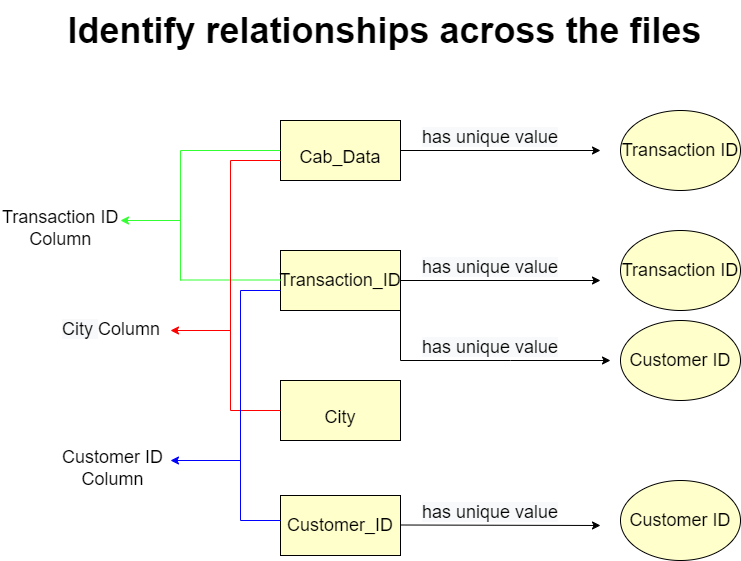

<b>- So, Now can marage all data that have relationship togather by creating master data.</b>

### Create master data and explain the relationship

In [180]:
# Create Master dataset 
Master_df= pd.merge(Transaction_df,Customer_df).merge(Cab_df, on='Transaction ID' ).merge(City_df, on = 'City')

In [181]:
# head function to see Frist Five columns from dataset 
Master_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,7,814885,24701
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,20,814885,24701
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,22,814885,24701
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,5,814885,24701
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,20,814885,24701


In [182]:
# dtypes function to know the data type for columns
Master_df.dtypes

Transaction ID                 int64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Year                           int64
Month                          int64
Day                            int64
Population                     int64
Users                          int64
dtype: object

In [183]:
# Get how many (Rows,Colums) in dataset
Master_df.shape

(359392, 17)

In [184]:
# To Know what is the columns names?
Master_df.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Year', 'Month', 'Day',
       'Population', 'Users'],
      dtype='object')

In [185]:
# To Show how many unique value in each column
Master_df.nunique()

Transaction ID        359392
Customer ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Year                       3
Month                     12
Day                       31
Population                19
Users                     19
dtype: int64

####  Processing Master_df 
- Check Master_df datatypes 
- Check Null values
- Check duplicates values
- Detect Outliers


##### Check Master_df datatypes 

In [186]:
# info function to know how many values (non-null) in each column
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Year                359392 non-null  int64         
 13  Month               359392 no

In [187]:
# Change data types for Population and Users Colmns
Master_df[['Population', 'Users']] = Master_df[['Population', 'Users']].apply(pd.to_numeric)
print(Master_df.dtypes)

Transaction ID                 int64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Year                           int64
Month                          int64
Day                            int64
Population                     int64
Users                          int64
dtype: object


##### Check Null values

In [188]:
Master_df.isna().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Year                  0
Month                 0
Day                   0
Population            0
Users                 0
dtype: int64

##### Check duplicates values

In [189]:
Duplicated_Rows = Master_df[Master_df.duplicated()]
print('Duplicated Rows =', Duplicated_Rows.shape[0])

Duplicated Rows = 0


##### Detect Outliers

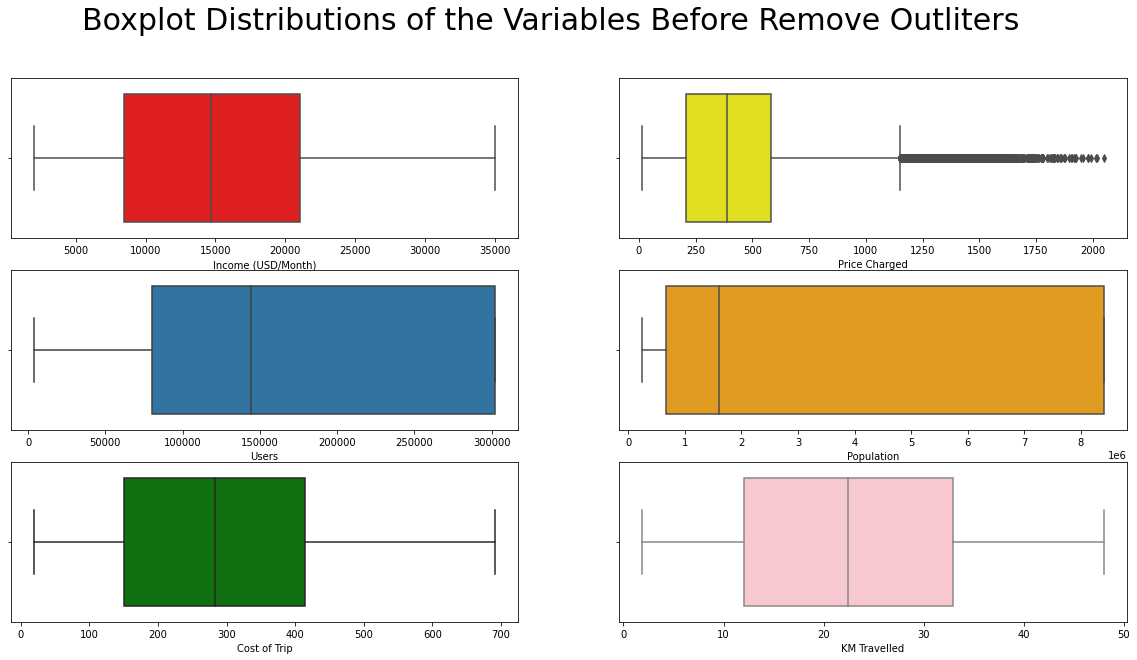

In [190]:
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3, 2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables Before Remove Outliters',fontsize=30)
Master=Master_df

sns.boxplot(ax=axes[0,0], x='Income (USD/Month)' ,color='red', data=Master)
sns.boxplot(ax=axes[0,1], x='Price Charged',color='yellow'  , data=Master) 
sns.boxplot(ax=axes[1,0], x='Users' ,  data=Master)
sns.boxplot(ax=axes[1,1], x='Population' , color='orange' , data=Master)
sns.boxplot(ax=axes[2,0], x='Cost of Trip' , color='green' ,   data=Master)
sns.boxplot(ax=axes[2,1], x='KM Travelled' ,color='pink' ,   data=Master);

- The Price Charged Column have Outlier. So Now I will calculate it. 

In [191]:
#Create Outlier function that will return us the Lower range and Upper range values from any column in dataset.
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [192]:
# Using the outlier_treatment function, lets get the lowerrange and upperrange values
lowerrange,upperrange = outlier_treatment(Master_df['Price Charged'])

In [193]:
# Check which column is considered as an outlier
Master_df[(Master_df['Price Charged'] < lowerrange) | (Master_df['Price Charged'] > upperrange)]

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Population,Users
24,10000384,27602,Card,Male,23,8542,2016-01-01,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,2016,1,1,814885,24701
28,10000385,27594,Cash,Male,28,3901,2016-01-08,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,2016,1,8,814885,24701
41,10000388,29039,Card,Male,35,17761,2016-01-06,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,2016,1,6,814885,24701
49,10000391,27891,Cash,Male,24,14593,2016-01-08,Yellow Cab,ATLANTA GA,38.08,1239.72,539.2128,2016,1,8,814885,24701
71,10000398,29558,Cash,Male,27,9555,2016-01-01,Yellow Cab,ATLANTA GA,38.85,1430.64,545.4540,2016,1,1,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314659,10157751,40671,Card,Female,20,15675,2017-03-23,Yellow Cab,TUCSON AZ,46.80,1197.32,673.9200,2017,3,23,631442,5712
314715,10169797,40032,Card,Female,29,15852,2017-05-07,Pink Cab,TUCSON AZ,35.35,1166.86,381.7800,2017,5,7,631442,5712
346554,10033711,51012,Cash,Female,63,25104,2016-05-07,Yellow Cab,WASHINGTON DC,44.84,1191.97,613.4112,2016,5,7,418859,127001
347685,10173969,53650,Cash,Male,34,16775,2017-05-06,Yellow Cab,WASHINGTON DC,45.22,1160.14,634.8888,2017,5,6,418859,127001


In [194]:
# Now  removeing the outliers from the dataset
Master_df.drop(Master_df[ (Master_df['Price Charged'] > upperrange) | (Master_df['Price Charged'] < lowerrange) ].index , inplace=True)

In [195]:
Master_df.shape

(353434, 17)

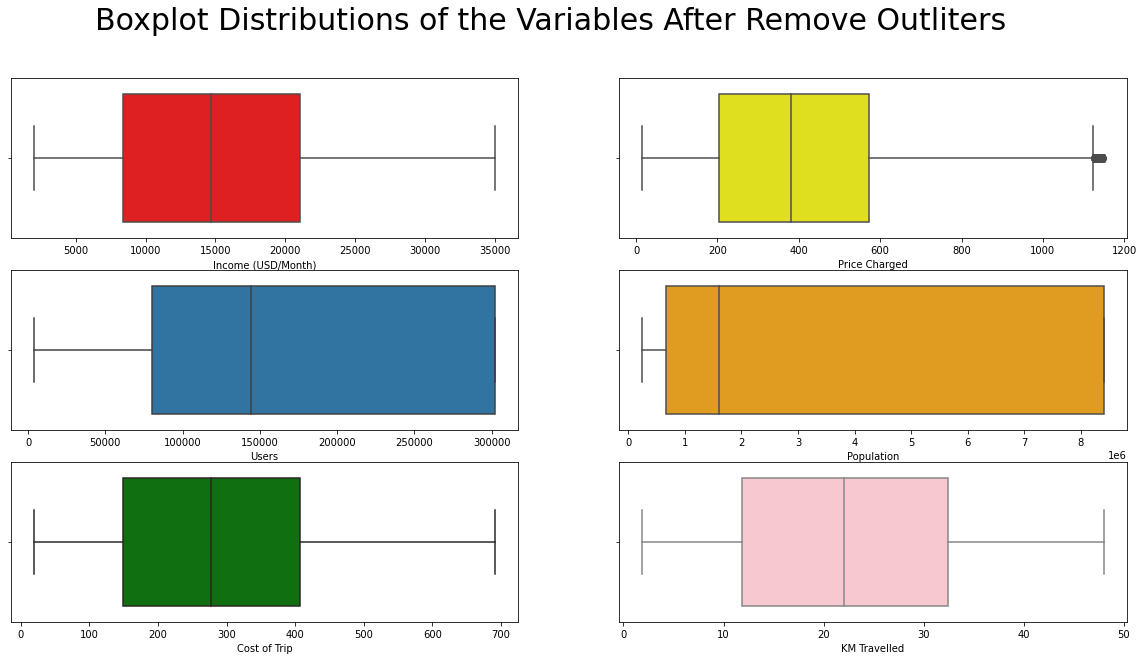

In [196]:
# I using Box Plot to detect Outliers in the dataset
fig,axes = plt.subplots(3, 2,figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables After Remove Outliters',fontsize=30)
Master=Master_df

sns.boxplot(ax=axes[0,0], x='Income (USD/Month)' ,color='red', data=Master)
sns.boxplot(ax=axes[0,1], x='Price Charged',color='yellow'  , data=Master) 
sns.boxplot(ax=axes[1,0], x='Users' ,  data=Master)
sns.boxplot(ax=axes[1,1], x='Population' , color='orange' , data=Master)
sns.boxplot(ax=axes[2,0], x='Cost of Trip' , color='green' ,   data=Master)
sns.boxplot(ax=axes[2,1], x='KM Travelled' ,color='pink' ,   data=Master);

###  Summary about Master Data set
- The Dataset types of columns are (object, float64, and int64)
- The  Dataset have (359392 Rows,  17 Columns)
- The Columns names ['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age','Income (USD/Month)', 'Date of Travel', 'Company', 'City',
    'KM Travelled', 'Price Charged', 'Cost of Trip', 'Year', 'Month', 'Day','Population', 'Users']
- No Missing Values 
- No Duplicated Rows
- Solve Outliers from Price Charged Column


In [197]:
# Convert some columns from object to category or from float to int64 datatypes to work with appropriate ones.

for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        Master_df[column] = Master_df[column].astype('category')
        
        
for column in ["Population", "Users" ] :
    
        Master_df[column] = Master_df[column].astype('int64')
        
print("\n New Feature's datatypes \n{}".format(Master_df.dtypes))


 New Feature's datatypes 
Transaction ID                 int64
Customer ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income (USD/Month)             int64
Date of Travel        datetime64[ns]
Company                     category
City                        category
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Year                           int64
Month                          int64
Day                            int64
Population                     int64
Users                          int64
dtype: object


In [198]:
Master_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,7,814885,24701
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,20,814885,24701
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,22,814885,24701
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,5,814885,24701
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,20,814885,24701


In [199]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353434 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      353434 non-null  int64         
 1   Customer ID         353434 non-null  int64         
 2   Payment_Mode        353434 non-null  category      
 3   Gender              353434 non-null  category      
 4   Age                 353434 non-null  int64         
 5   Income (USD/Month)  353434 non-null  int64         
 6   Date of Travel      353434 non-null  datetime64[ns]
 7   Company             353434 non-null  category      
 8   City                353434 non-null  category      
 9   KM Travelled        353434 non-null  float64       
 10  Price Charged       353434 non-null  float64       
 11  Cost of Trip        353434 non-null  float64       
 12  Year                353434 non-null  int64         
 13  Month               353434 no

### Seprate the Master_df dateset in to 2 datasets 
 1. Pink_dataset 
 2. Yellow_dataset

In [200]:
# I deivide the Master_df dateset in to pink_dataset and yellow_dataset based on the type of company.
Pink_dataset = Master_df [Master_df['Company'] == 'Pink Cab'] 
Yellow_dataset = Master_df [Master_df['Company'] == 'Yellow Cab']

In [201]:
print("Shape the Pink Dataset",Pink_dataset.shape)
print("Shape the Yellow Dataset",Yellow_dataset.shape)

Shape the Pink Dataset (84693, 17)
Shape the Yellow Dataset (268741, 17)


In [202]:
Pink_dataset.head() 

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,7,814885,24701
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,5,814885,24701
6,10395626,27703,Card,Male,27,9237,2018-10-26,Pink Cab,ATLANTA GA,13.39,167.03,141.934,2018,10,26,814885,24701
7,10000013,28712,Cash,Male,53,11242,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,1,814885,24701
11,10000014,28020,Cash,Male,23,23327,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,6,814885,24701


In [203]:
Yellow_dataset.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Population,Users
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,20,814885,24701
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,22,814885,24701
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,20,814885,24701
5,10324737,27703,Cash,Male,27,9237,2018-05-03,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,2018,5,3,814885,24701
8,10079404,28712,Card,Male,53,11242,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,2016,9,20,814885,24701


### Features Analysis

#### Distribution number of Users for each Cab Firm 2016-2018

In [204]:
# Create Data Frame for count number of Users for each Cab Firm 2016 - 2018.
Master_User_df = Master_df.groupby(["Users", "Company","Year"])\
.count()["Customer ID"]\
.unstack(["Year","Company"])

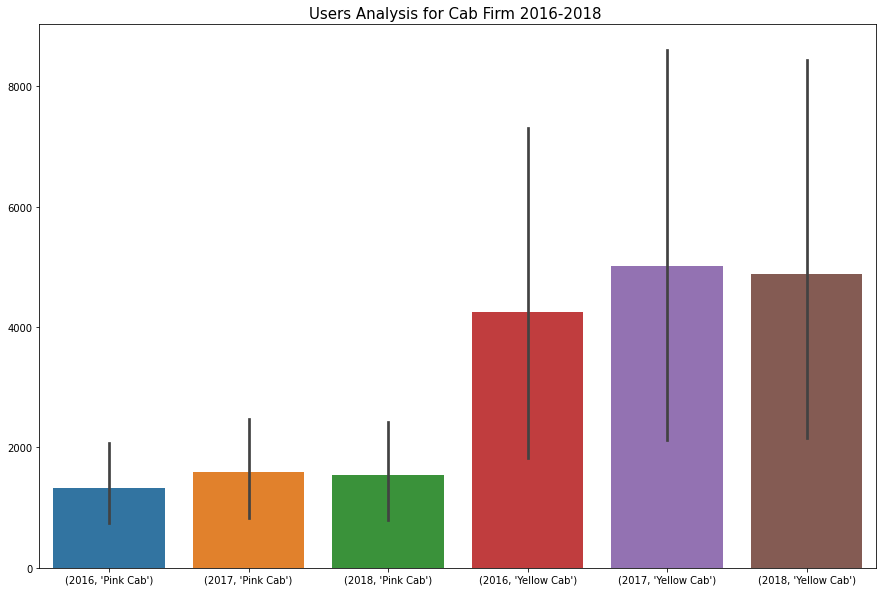

In [205]:
plt.figure(figsize=(15,10))
sns.barplot(data=Master_User_df)
plt.title("Users Analysis for Cab Firm 2016-2018 ",fontsize="15");

##### Distribution number of user for Pink Cab firm in all Cities

In [206]:
# Create Data Frame for count number of Transaction for each Cab Firm in Cities
Master_City_df = Master_df.groupby(["City", "Company"])\
.count()["Transaction ID"]\
.unstack("Company")

<Figure size 1080x720 with 0 Axes>

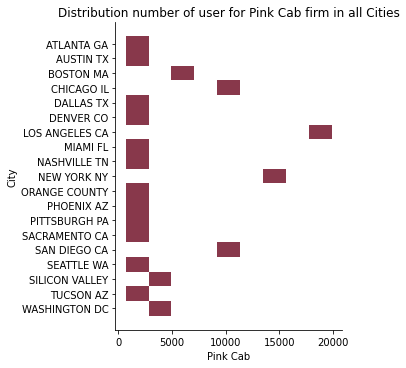

In [207]:
plt.figure(figsize=(15,10))

sns.displot(data=Master_City_df, y="City", x="Pink Cab",color="Pink")

plt.title("Distribution number of user for Pink Cab firm in all Cities");

##### Distribution number of user for Yellow Cab firm in all Cities

<Figure size 1080x720 with 0 Axes>

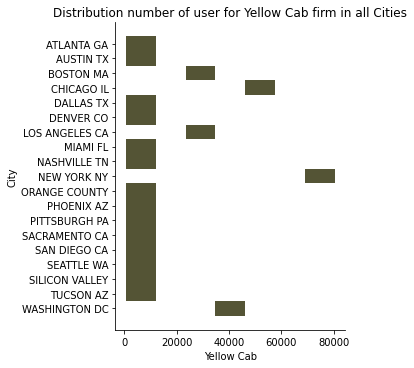

In [208]:
plt.figure(figsize=(15,10))

sns.displot(data=Master_City_df, y="City", x="Yellow Cab",color="yellow")

plt.title("Distribution number of user for Yellow Cab firm in all Cities");

#### Distribution (Gender) and (Payment_Mode) for each company 

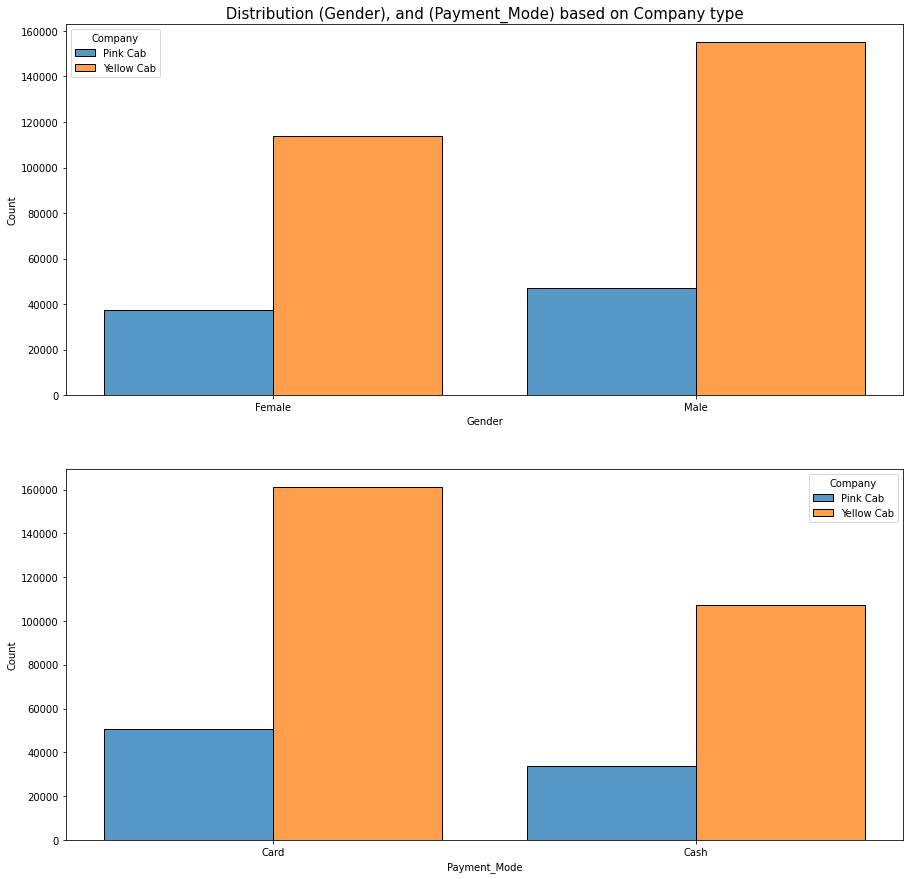

In [209]:
plt.figure(figsize=(15,15))

plt.subplot(2, 1, 1)
plt.title(" Distribution (Gender), and (Payment_Mode) based on Company type ", loc="center",fontsize='15')

sns.histplot(data=Master_df, x="Gender", hue="Company", common_norm=False,shrink=.8,multiple="dodge")


plt.subplot(2, 1, 2)
sns.histplot(data=Master_df, x="Payment_Mode", hue="Company", common_norm=False,shrink=.8,multiple="dodge")


#plt.tight_layout()
plt.show()


#### Distribution of (Users) for  Cab Firm Companies

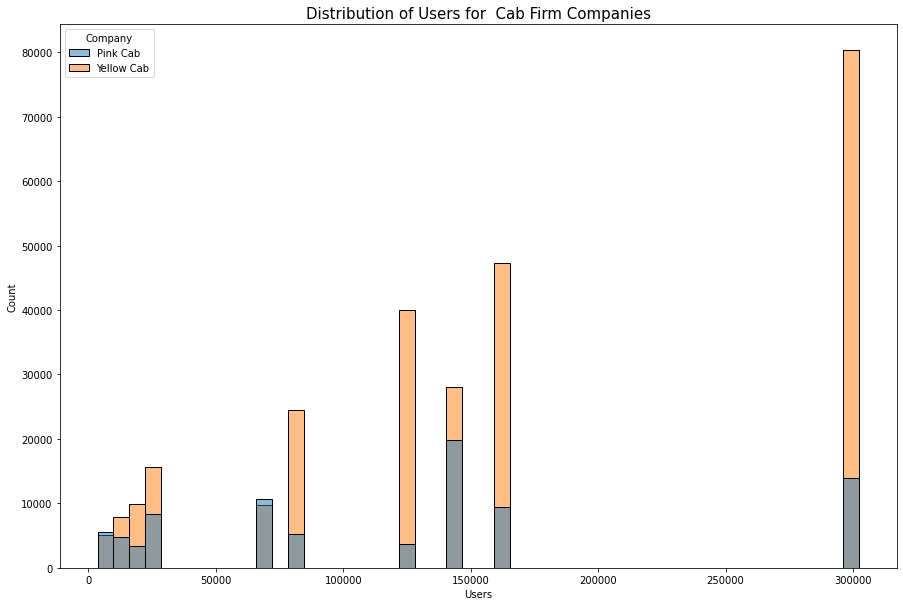

In [210]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.histplot(
    data=Master_df,
    x="Users",
    hue="Company"
)

#plot title
plt.title("Distribution of Users for  Cab Firm Companies",fontsize='15');

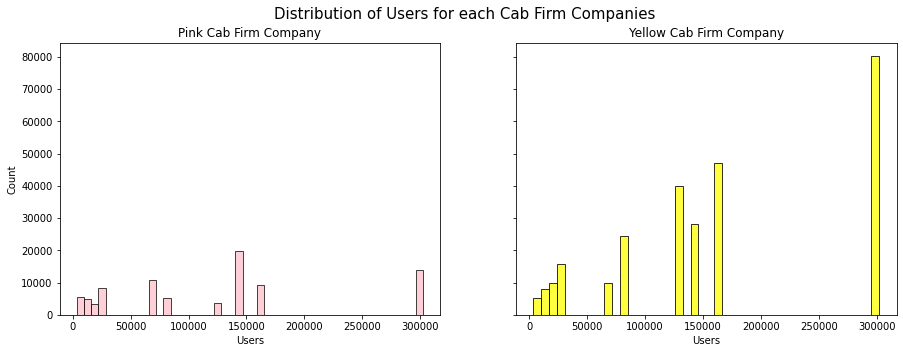

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of Users for each Cab Firm Companies',fontsize="15")

sns.histplot(ax=axes[0], x=Pink_dataset.Users,color="Pink")
axes[0].set_title("Pink Cab Firm Company")

sns.histplot(ax=axes[1], x=Yellow_dataset.Users,color='Yellow')
axes[1].set_title("Yellow Cab Firm Company");

#### Distribution of (Population) for  Cab Firm Companies

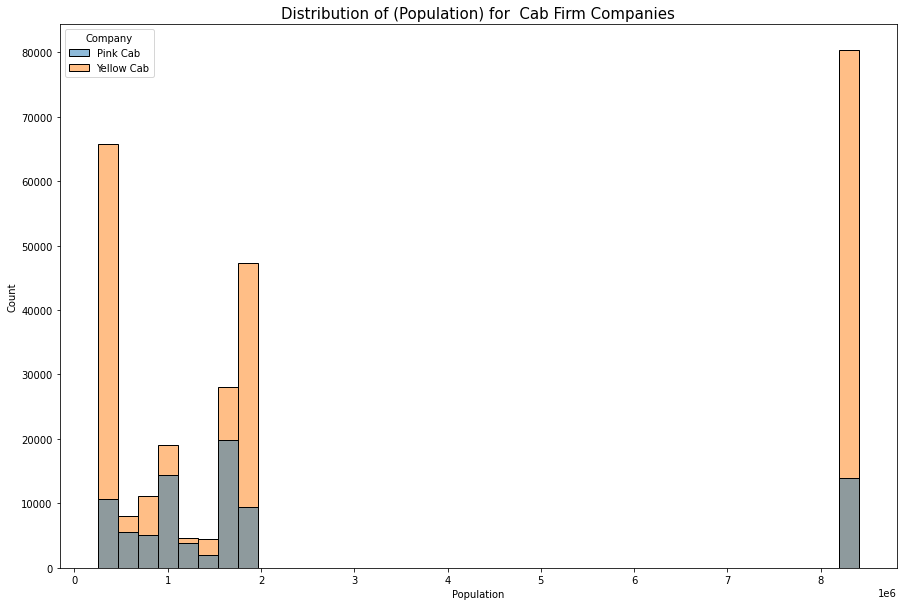

In [212]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.histplot(
    data=Master_df,
    x="Population",
    hue="Company"
)

#plot title
plt.title("Distribution of (Population) for  Cab Firm Companies",fontsize='15');

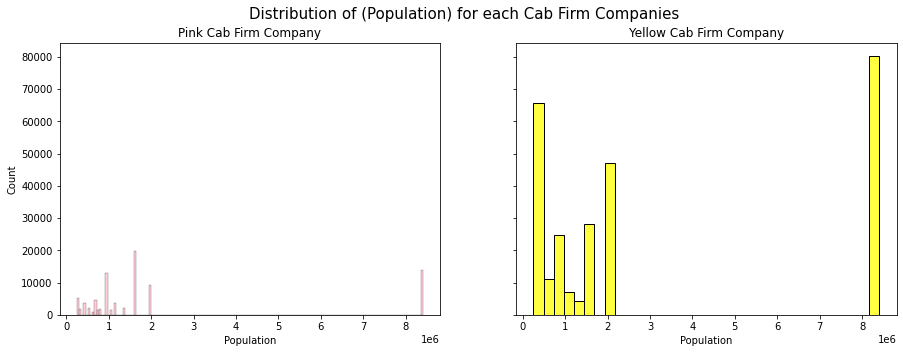

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of (Population) for each Cab Firm Companies',fontsize="15")

# Bulbasaur
sns.histplot(ax=axes[0], x=Pink_dataset.Population,color="Pink")
axes[0].set_title("Pink Cab Firm Company")

# Charmander
sns.histplot(ax=axes[1], x=Yellow_dataset.Population,color='Yellow')
axes[1].set_title("Yellow Cab Firm Company");

#### Distribution of (Income (USD/Month)) for  Cab Firm Companies

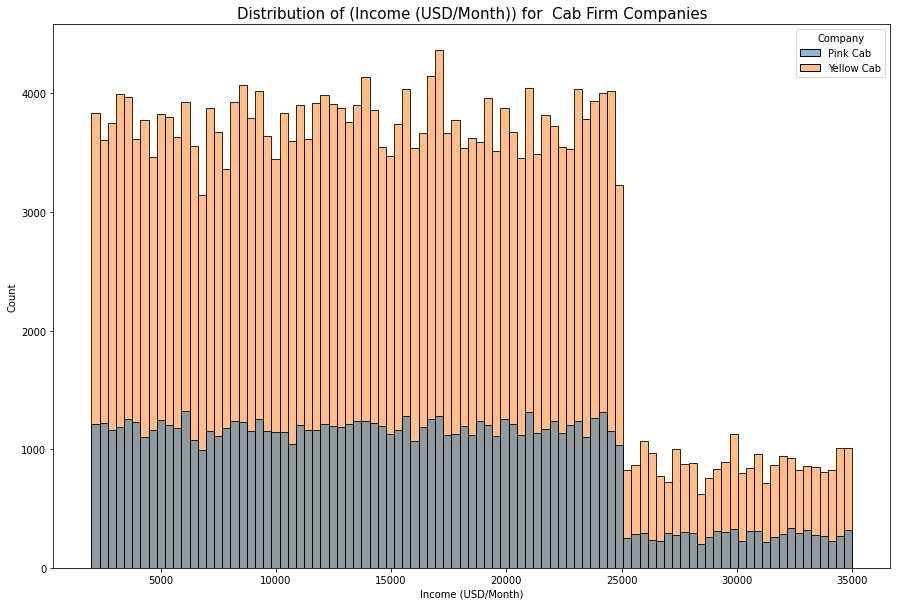

In [214]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.histplot(
    data=Master_df,
    x="Income (USD/Month)",
    hue="Company"
)

#plot title
plt.title("Distribution of (Income (USD/Month)) for  Cab Firm Companies",fontsize='15');

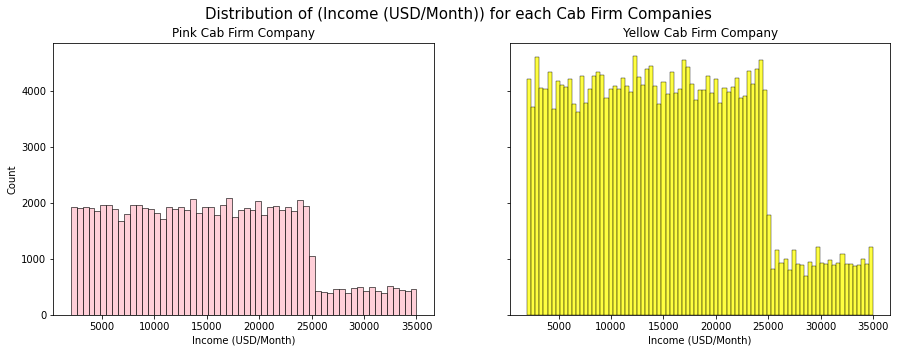

In [215]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of (Income (USD/Month)) for each Cab Firm Companies',fontsize="15")

# Bulbasaur
sns.histplot(ax=axes[0], x=Pink_dataset['Income (USD/Month)'],color="Pink")
axes[0].set_title("Pink Cab Firm Company")

# Charmander
sns.histplot(ax=axes[1], x=Yellow_dataset['Income (USD/Month)'],color='Yellow')
axes[1].set_title("Yellow Cab Firm Company");

#### Distribution of (Age) for  Cab Firm Companies

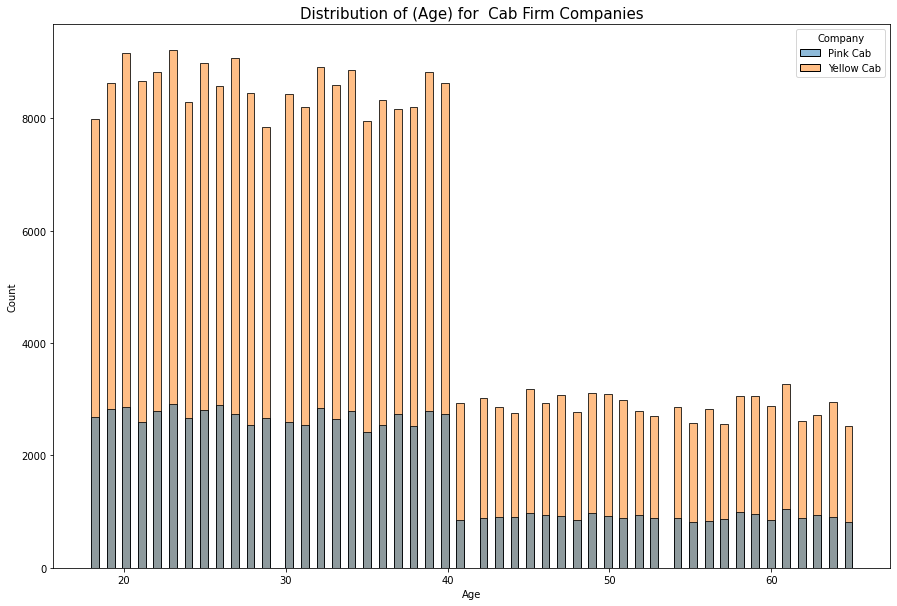

In [216]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.histplot(
    data=Master_df,
    x="Age",
    hue="Company"
)

#plot title
plt.title("Distribution of (Age) for  Cab Firm Companies",fontsize='15');

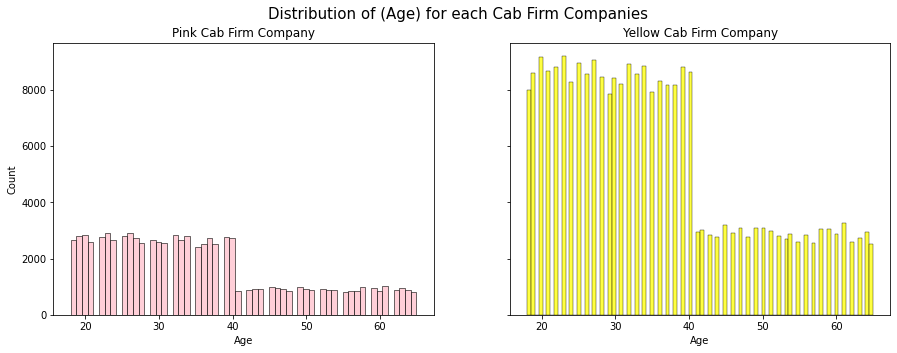

In [217]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of (Age) for each Cab Firm Companies',fontsize="15")

# Bulbasaur
sns.histplot(ax=axes[0], x=Pink_dataset.Age,color="Pink")
axes[0].set_title("Pink Cab Firm Company")

# Charmander
sns.histplot(ax=axes[1], x=Yellow_dataset.Age,color='Yellow')
axes[1].set_title("Yellow Cab Firm Company");

#### Distribution of (Price Charged) for  Cab Firm Companies

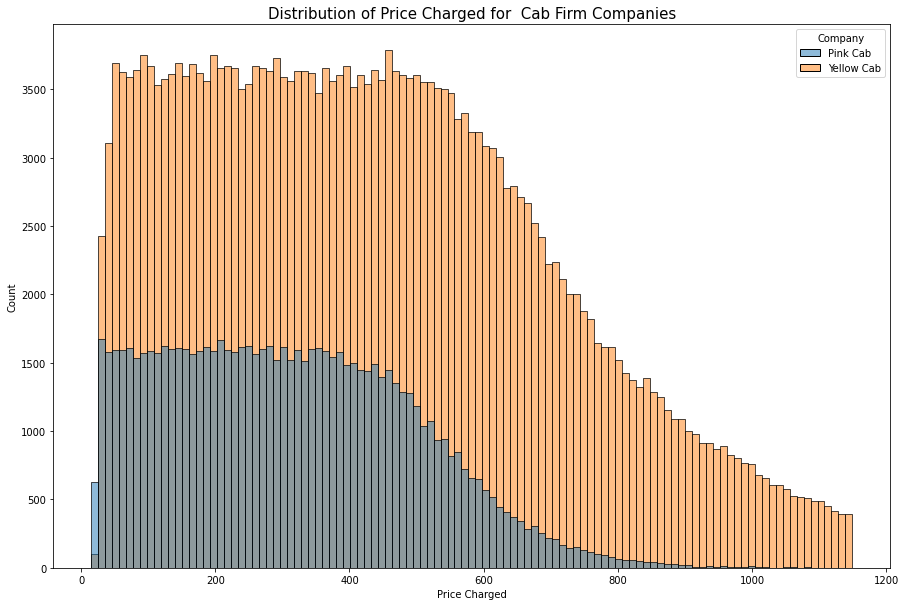

In [218]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.histplot(
    data=Master_df,
    x="Price Charged",
    hue="Company"
)

#plot title
plt.title("Distribution of Price Charged for  Cab Firm Companies",fontsize='15');

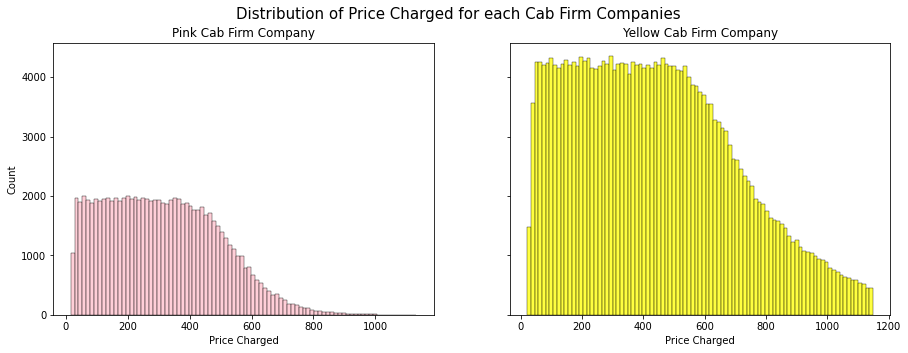

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of Price Charged for each Cab Firm Companies',fontsize="15")

# Bulbasaur
sns.histplot(ax=axes[0], x=Pink_dataset['Price Charged'],color="Pink")
axes[0].set_title("Pink Cab Firm Company")

# Charmander
sns.histplot(ax=axes[1], x=Yellow_dataset['Price Charged'],color='Yellow')
axes[1].set_title("Yellow Cab Firm Company");

#### Distribution of (KM Travelled) for  Cab Firm Companies

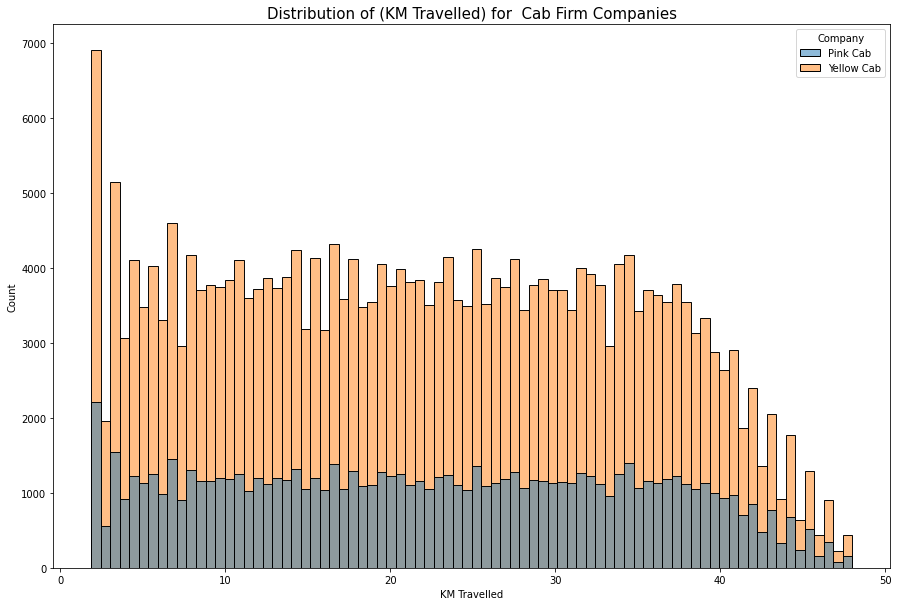

In [220]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.histplot(
    data=Master_df,
    x="KM Travelled",
    hue="Company"
)

#plot title
plt.title("Distribution of (KM Travelled) for  Cab Firm Companies",fontsize='15');

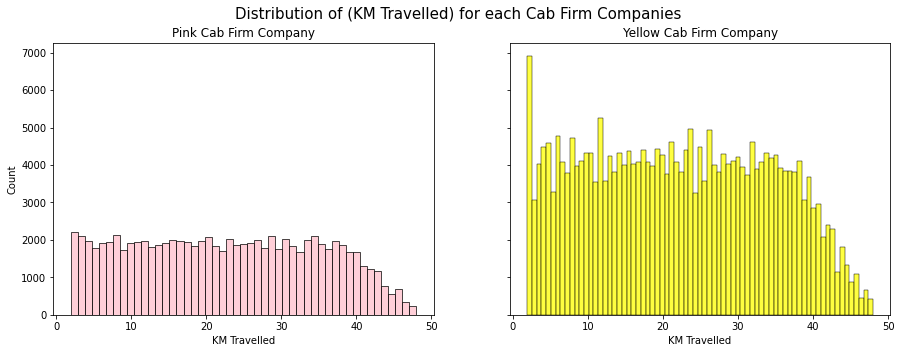

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of (KM Travelled) for each Cab Firm Companies',fontsize="15")

# Bulbasaur
sns.histplot(ax=axes[0], x=Pink_dataset['KM Travelled'],color="Pink")
axes[0].set_title("Pink Cab Firm Company")

# Charmander
sns.histplot(ax=axes[1], x=Yellow_dataset['KM Travelled'],color='Yellow')
axes[1].set_title("Yellow Cab Firm Company");

#### Distribution of (Cost of Trip) for  Cab Firm Companies

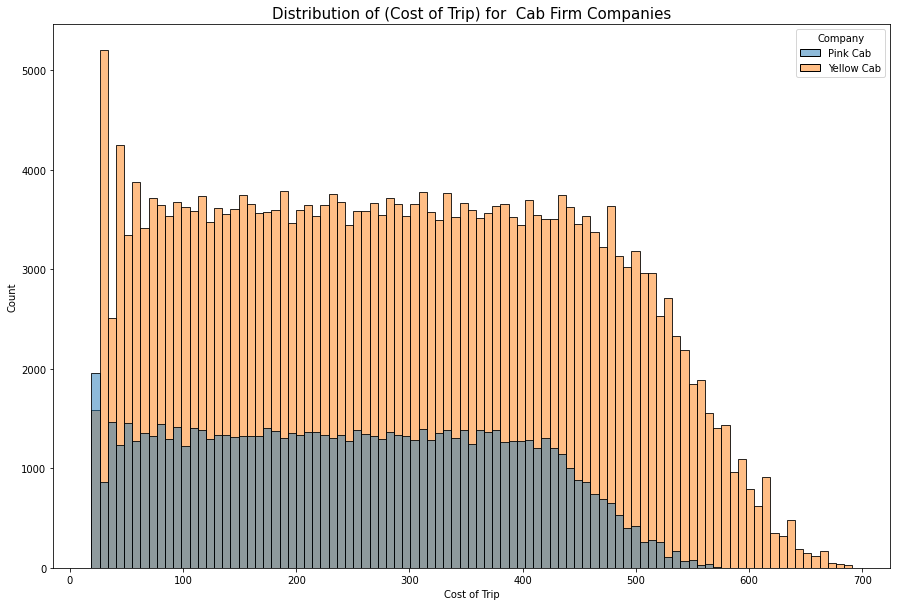

In [222]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.histplot(
    data=Master_df,
    x="Cost of Trip",
    hue="Company"
)

#plot title
plt.title("Distribution of (Cost of Trip) for  Cab Firm Companies",fontsize='15');

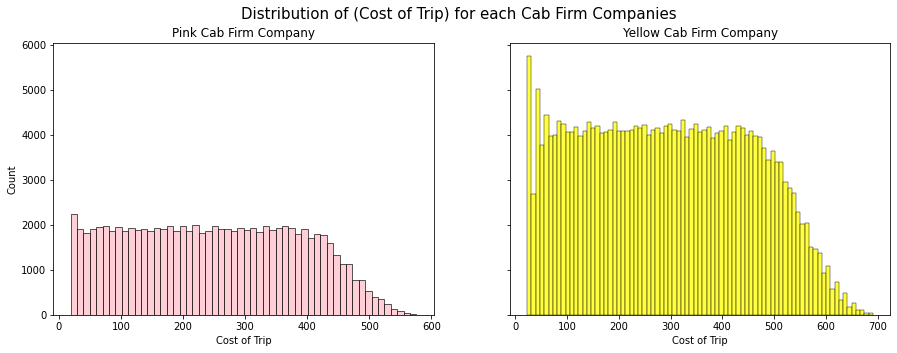

In [223]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of (Cost of Trip) for each Cab Firm Companies',fontsize="15")

# Bulbasaur
sns.histplot(ax=axes[0], x=Pink_dataset['Cost of Trip'],color="Pink")
axes[0].set_title("Pink Cab Firm Company")

# Charmander
sns.histplot(ax=axes[1], x=Yellow_dataset['Cost of Trip'],color='Yellow')
axes[1].set_title("Yellow Cab Firm Company");

#### Sammary about Distribuation
1. Distribution of Users the Cab Firm based on city: Users using Yellow Cab higher than Pink Cab.
2. Distribution of Gender: Females and Males Using Yellow Cab higher than Pink Cab.
3. Distribution of Payment_Mode: Users pay by Cash and card in Yellow Cab higher than in Pink Cab.
4. Distribution of Users: Users Count shows the Users Favor the Yellow Cab higher than Pink Cab. 
5. Distribution of Population: The number of Users Favors Yellow Cab higher than Pink Cab.
6. Distribution of Income (USD/Month): Yellow Cab have higher income than Pink Cab.
7. Distribution of Age: Different ages of users Favor Yellow Cab over Pink Cab.
8. Distribution of Price Charged: Users used Price Charged in Yellow Cab higher than Pink Cab. 
6. Distribution of KM Travelled: Yellow Cab users prefer to travel a longer distance than Pink Cab.
6. Distribution of Cost of Trip: Users who use Yellow Cab pay higher than they use Pink Cab.<br>
<b> So, The Yellow Cab firm have higher Rating than Pink Cab Firm through Features analysis.</b>

### Correlations


In [224]:
Master_df.corr(method='spearman')

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Population,Users
Transaction ID,1.000000,-0.027869,-0.000854,-0.001005,0.007242,-0.030254,0.005503,0.941494,0.291900,0.015025,0.027549,0.016731
Customer ID,-0.027869,1.000000,0.002029,-0.015260,0.028266,-0.177763,0.018796,-0.006648,-0.061882,0.000440,-0.985724,-0.856476
Age,-0.000854,0.002029,1.000000,0.004493,-0.000143,-0.002189,0.000017,-0.000386,-0.001543,-0.000997,-0.001507,-0.002470
Income (USD/Month),-0.001005,-0.015260,0.004493,1.000000,-0.000961,0.002232,-0.001055,-0.001287,0.001139,0.000403,0.014824,0.012161
KM Travelled,0.007242,0.028266,-0.000143,-0.000961,1.000000,0.890284,0.984466,0.004411,0.008738,0.001698,-0.029064,-0.026502
Price Charged,-0.030254,-0.177763,-0.002189,0.002232,0.890284,1.000000,0.911278,-0.023438,-0.027288,-0.003825,0.179976,0.171618
Cost of Trip,0.005503,0.018796,0.000017,-0.001055,0.984466,0.911278,1.000000,0.003852,0.003115,0.001839,-0.019425,-0.003816
Year,0.941494,-0.006648,-0.000386,-0.001287,0.004411,-0.023438,0.003852,1.000000,-0.030822,-0.022072,0.006065,0.004005
Month,0.291900,-0.061882,-0.001543,0.001139,0.008738,-0.027288,0.003115,-0.030822,1.000000,0.045187,0.062569,0.035777
Day,0.015025,0.000440,-0.000997,0.000403,0.001698,-0.003825,0.001839,-0.022072,0.045187,1.000000,-0.000284,-0.001212


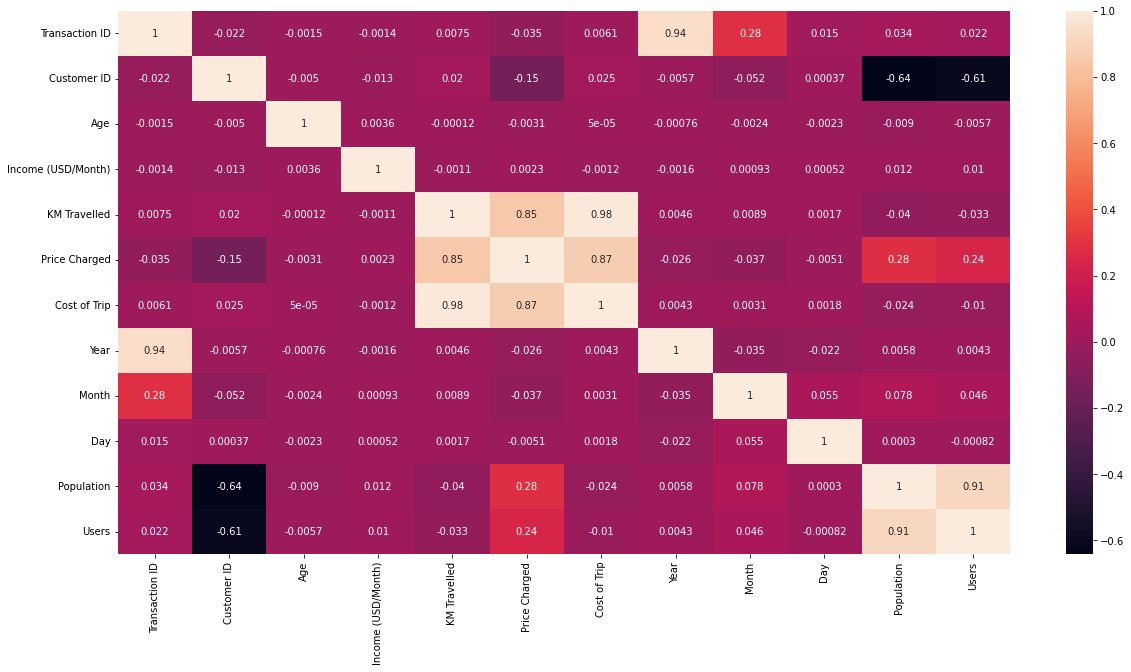

In [225]:
corelation= Master_df.corr()
corelation.head()
plt.figure(figsize=(20,10))
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True);

#### From the correlation Table and Heatmap there are many relationships between thesis Features
1. Cost of Trip & KM Travelled
2. Price Charged & KM Travelled
3. Price Charged & Cost of Trip

##### 1.  KM Travelled & Cost of Trip 

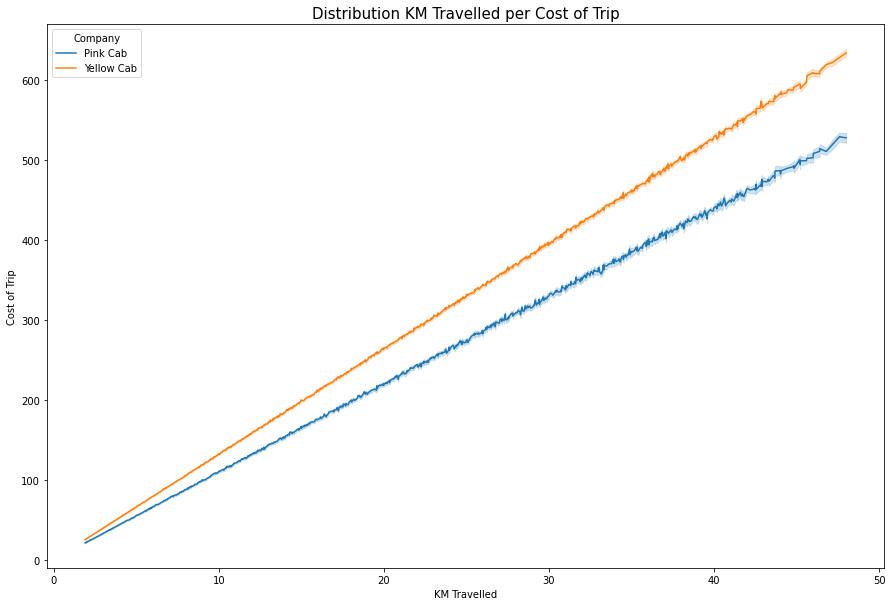

In [226]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.lineplot(
    data=Master_df,
    x="KM Travelled",
    y="Cost of Trip",
    hue="Company"
)

#plot title
plt.title("Distribution KM Travelled per Cost of Trip",fontsize='15');

<b> So, In Distribution KM Travelled per Cost of Trip,the visualizations shows that  Yellow Cab Firm higher than Pink Cab Firm  </b>

##### 2. KM Travelled & Price Charged

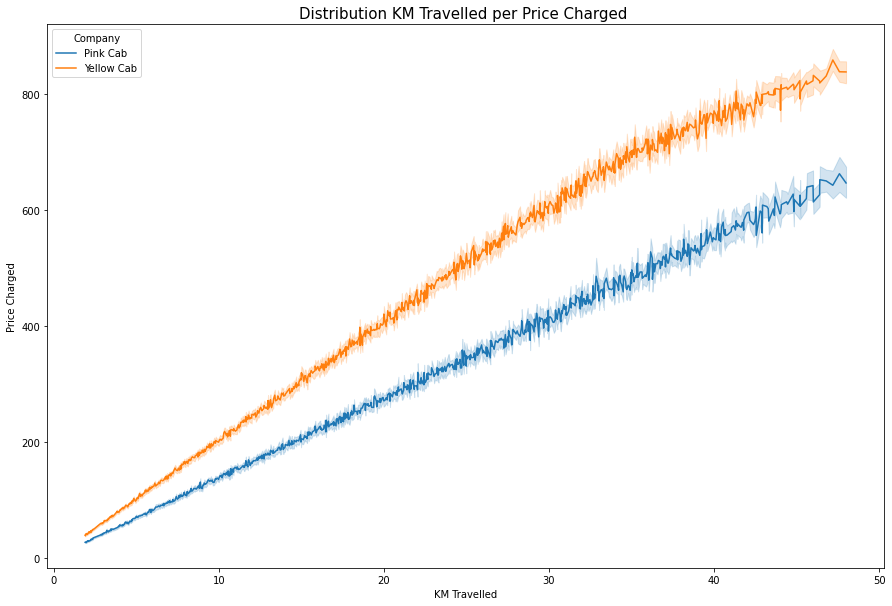

In [227]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.lineplot(
    data=Master_df,
    x="KM Travelled",
    y="Price Charged",
    hue="Company"
)

#plot title
plt.title("Distribution KM Travelled per Price Charged ",fontsize='15');

<b> So, In Distribution KM Travelled per Price Charged,the visualizations shows that Yellow Cab Firm higher than Pink Cab Firm  </b>

##### 3. Price Charged & Cost of Trip

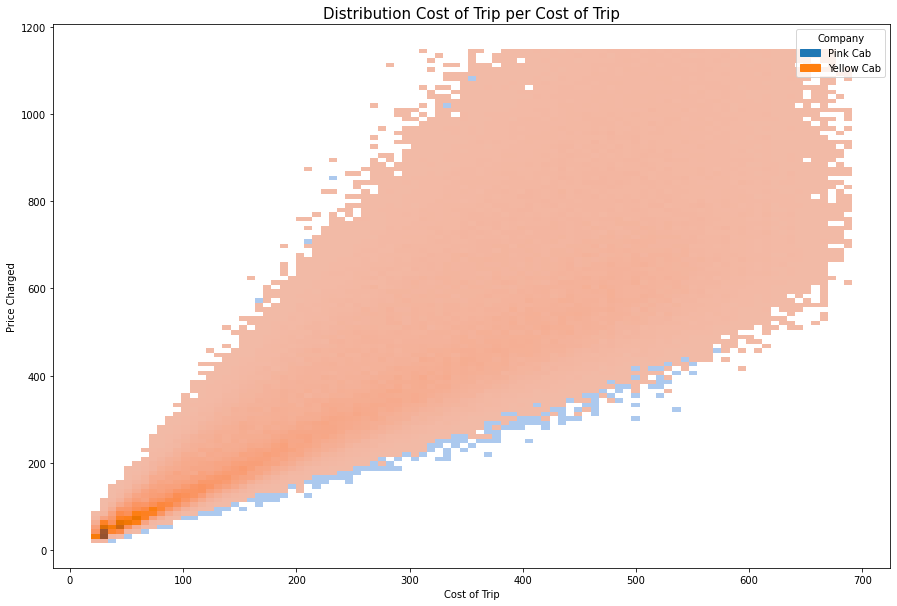

In [228]:
# plot Figure size
plt.figure(figsize=(15,10))

#plot
sns.histplot(
    data=Master_df,
    x="Cost of Trip",
    y="Price Charged",
    hue="Company"
)

#plot title
plt.title("Distribution Cost of Trip per Cost of Trip",fontsize='15');

<b> So, In Distribution Cost of Trip per Price Charged,the visualizations shows that Yellow Cab Firm higher than Pink Cab Firm  </b>

### Analysis 

#### 1. Users Analysis
- Yearly Users Analysis for each Cab firm 
- Using Master_User_df
- Visualization

In [229]:
#Using Data frame Master_User_df to user Analysis

Master_User_df.head()

Year,2016,2017,2018,2016,2017,2018
Company,Pink Cab,Pink Cab,Pink Cab,Yellow Cab,Yellow Cab,Yellow Cab
Users,,,,,,
3643,211,238,233,195,213,216
5712,236,283,279,337,399,394
6133,261,305,298,356,433,407
7044,391,471,472,314,357,360
9270,551,656,634,346,420,400


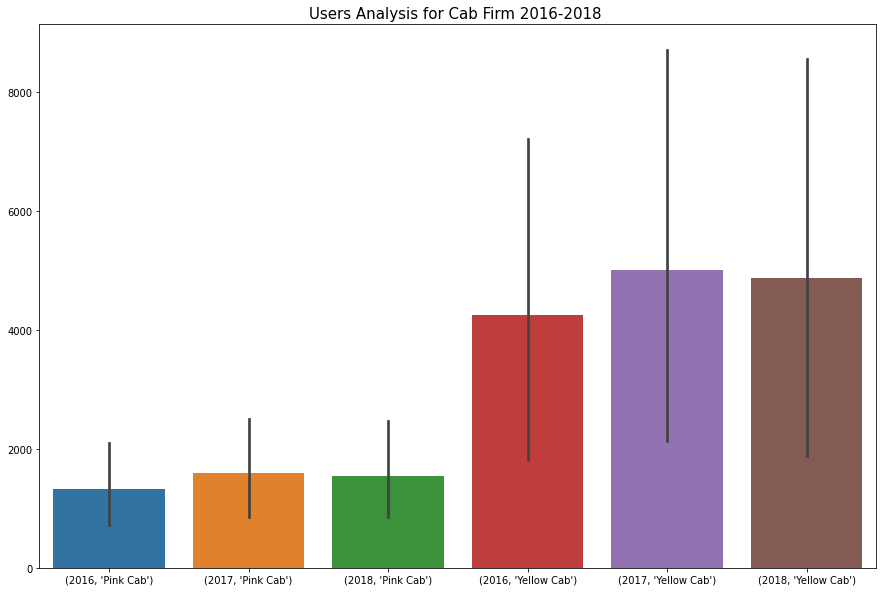

In [230]:
#Plot Size
plt.figure(figsize=(15,10))

#plot
sns.barplot(data=Master_User_df)

#Plot title
plt.title("Users Analysis for Cab Firm 2016-2018 ",fontsize="15");

<b> So, In Users Analysis ,the visualizations shows that Yellow Cab Firm higher than Pink Cab Firm  </b>

#### 2. Profit Analysis
- Insert new column (Profit_of_Trip)
- Using groupby() to calculate the total of profit for each cab firm every year
- visualization

In [231]:
# Using DataFrame.insert() to add a column (Profit of Trip)
Master_df.insert(17, "Profit_of_Trip",Master_df["Price Charged"] - Master_df["Cost of Trip"], True)

In [232]:
Master_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Population,Users,Profit_of_Trip
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,7,814885,24701,57.3150
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,20,814885,24701,281.2772
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,22,814885,24701,194.6480
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,5,814885,24701,23.6660
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,20,814885,24701,253.9808


In [233]:
Profit_df = Master_df.groupby(["Company","Year"])\
.sum()["Profit_of_Trip"]\
.unstack(["Year"])
Profit_df.head()

Year,2016,2017,2018
Company,,,
Pink Cab,1.733832e+06,2.008849e+06,1.549201e+06
Yellow Cab,1.239542e+07,1.456178e+07,1.256915e+07


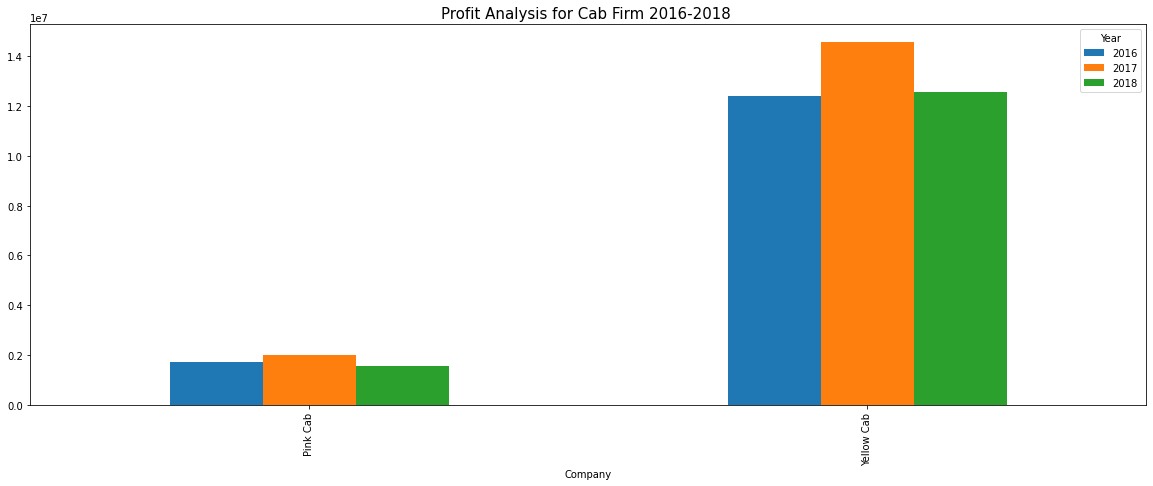

In [234]:
#plot
Profit_df.plot(kind='bar',figsize=(20,7))

plt.title("Profit Analysis for Cab Firm 2016-2018 ",fontsize="15");

<b> So, In Profit Analysis ,the visualizations shows that Yellow Cab Firm higher than Pink Cab Firm  </b>

### Tranacation Analysis
- Number of Transaction for all Cabs firms in all Cities
    - Number of Transaction for Pink Cab firm in all Cities
    - Number of Transaction for Yellow Cab firm in all Cities
- Yearly number of Trancations
    -  Yearly Number of Trancations for pink Cab Firm
    -  Yearly Number of Trancations for Yellow Cab Firm


#### Number of Transaction for all Cabs firms in all Cities

In [235]:
# Using Master_City_df
Master_City_df.head(20)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5782
AUSTIN TX,1868,3011
BOSTON MA,5186,24505
CHICAGO IL,9361,47254
DALLAS TX,1380,5534
DENVER CO,1394,2419
LOS ANGELES CA,19865,28102
MIAMI FL,1987,4436
NASHVILLE TN,1841,1166


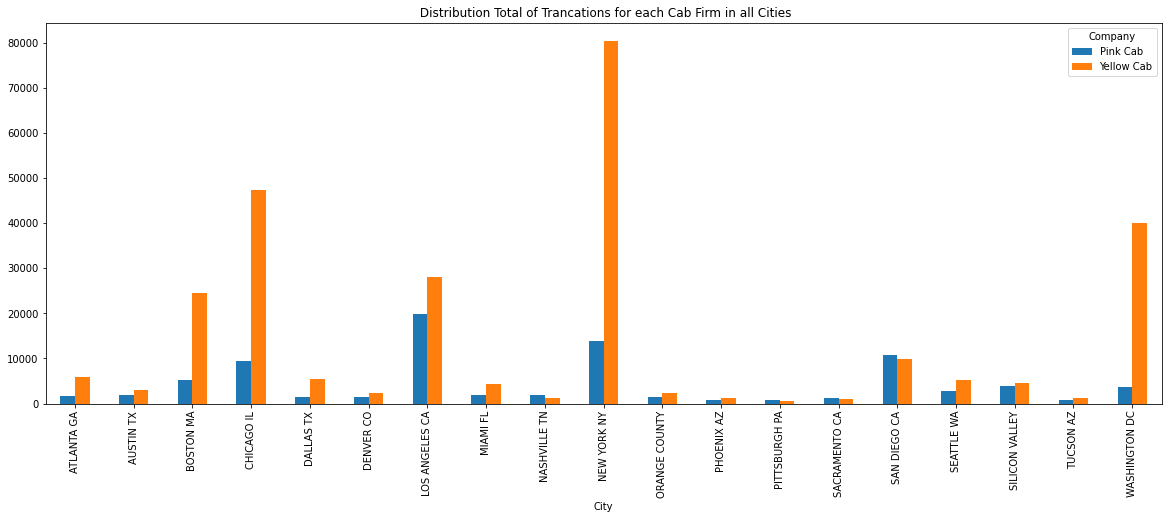

In [236]:
# Plot
Master_City_df.plot(kind='bar',title=" Distribution Total of Trancations for each Cab Firm in all Cities",figsize=(20,7));

<b> So, In Transaction Analysis ,the visualizations shows that Yellow Cab Firm higher than Pink Cab Firm  </b>

##### Number of Transaction for Pink Cab firm in all Cities

In [237]:
# Create Data Frame for count number of Transaction for Pink Cab Firm in Cities
Pink_City_df = Pink_dataset.groupby(["City"])\
.count()["Transaction ID"]
Pink_City_df.head(20)

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           1987
NASHVILLE TN       1841
NEW YORK NY       13965
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           798
WASHINGTON DC      3692
Name: Transaction ID, dtype: int64

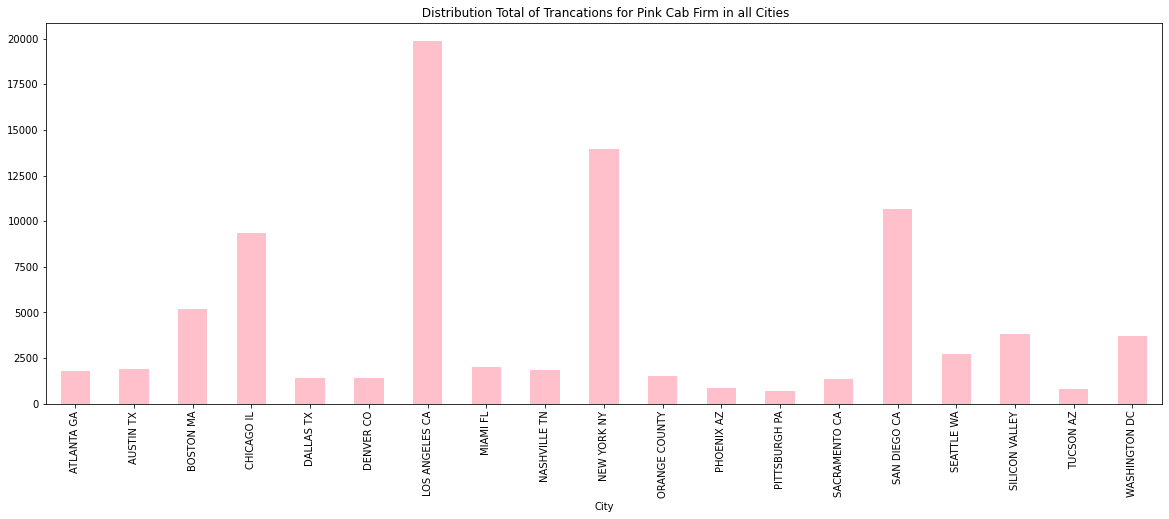

In [238]:
#Plot
Pink_City_df.plot(kind='bar',title=" Distribution Total of Trancations for Pink Cab Firm in all Cities",figsize=(20,7),color="Pink");

<b> So, In Transaction Analysis for Pink Cab Firm ,the visualizations shows the City Los Angeles CA the hesight    </b>

##### Number of Transaction for Yellow Cab firm in all Cities

In [239]:
# Create Data Frame for count number of Transaction for Yellow Cab Firm in Cities
Yellow_City_df = Yellow_dataset.groupby(["City"])\
.count()["Transaction ID"]
Yellow_City_df.head(20)

City
ATLANTA GA         5782
AUSTIN TX          3011
BOSTON MA         24505
CHICAGO IL        47254
DALLAS TX          5534
DENVER CO          2419
LOS ANGELES CA    28102
MIAMI FL           4436
NASHVILLE TN       1166
NEW YORK NY       80348
ORANGE COUNTY      2441
PHOENIX AZ         1196
PITTSBURGH PA       624
SACRAMENTO CA      1031
SAN DIEGO CA       9812
SEATTLE WA         5260
SILICON VALLEY     4648
TUCSON AZ          1130
WASHINGTON DC     40042
Name: Transaction ID, dtype: int64

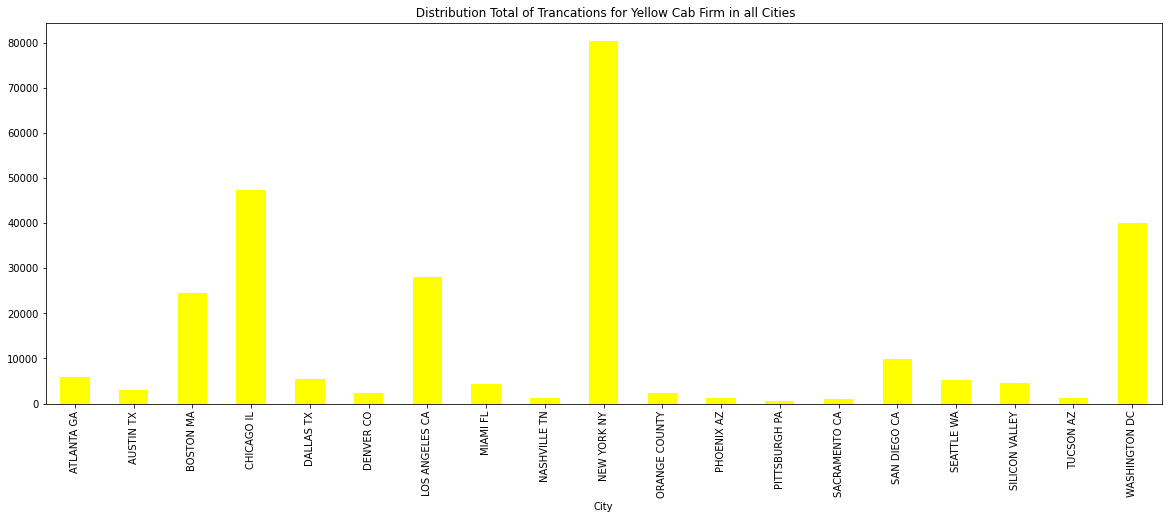

In [240]:
#plot
Yellow_City_df.plot(kind='bar',title=" Distribution Total of Trancations for Yellow Cab Firm in all Cities",figsize=(20,7),color="Yellow");

<b> So, In Transaction Analysis for Yellow Cab Firm ,the visualizations shows the City New Yourk NY the hesight    </b>

#### Yearly number of Trancations
- Yearly Number of Trancations for pink Cab Firm
- Yearly Number of Trancations for Yellow Cab Firm

##### Yearly Number of Trancations for pink Cab Firm

In [241]:
Yearly_Transaction_Pink = Pink_dataset.groupby('Year')['Transaction ID'].count()
Yearly_Transaction_Pink.head()

Year
2016    25278
2017    30198
2018    29217
Name: Transaction ID, dtype: int64

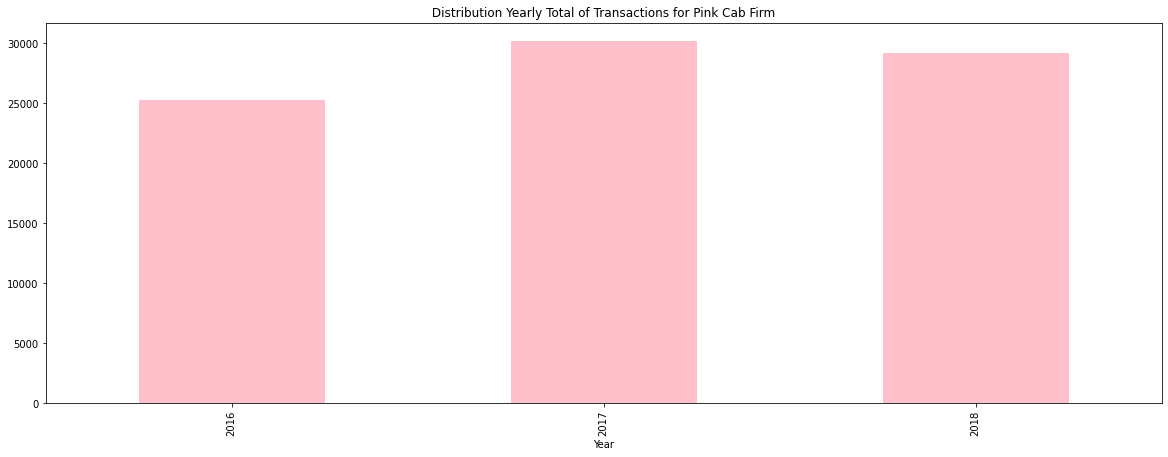

In [242]:
# Plot
Yearly_Transaction_Pink.plot(kind='bar',title=" Distribution Yearly Total of Transactions for Pink Cab Firm ",figsize=(20,7),color="pink");

<b> So, In Yearly Number of Trancations for pink Cab Firm, the visualizations shows the hesight year is 2017   </b>

##### Yearly Number of Trancations for Yellow Cab Firm

In [243]:
Yearly_Transaction_Yellow = Yellow_dataset.groupby('Year')['Transaction ID'].count()
Yearly_Transaction_Yellow.head()

Year
2016    80738
2017    95302
2018    92701
Name: Transaction ID, dtype: int64

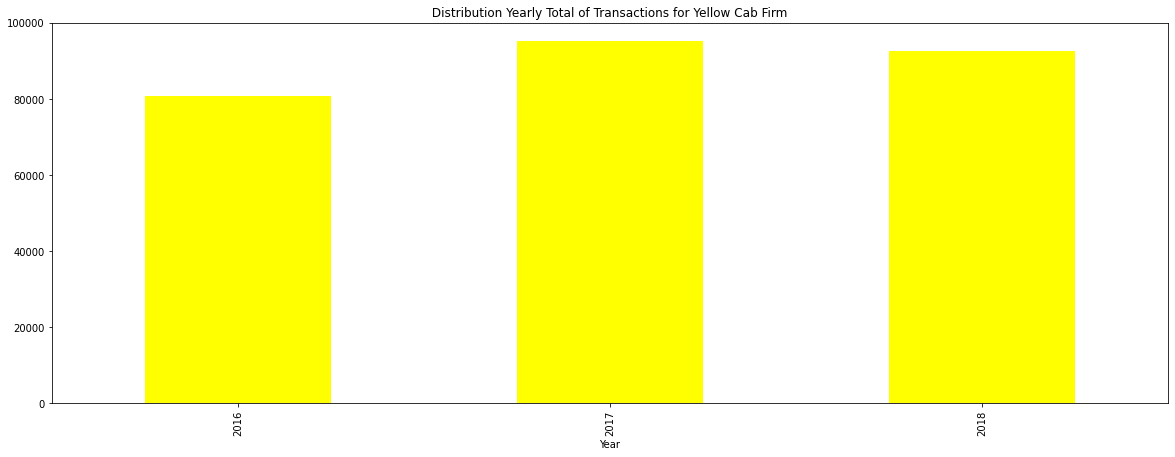

In [244]:
# Plot 
Yearly_Transaction_Yellow.plot(kind='bar',title=" Distribution Yearly Total of Transactions for Yellow Cab Firm ",figsize=(20,7),color="Yellow");

<b> So, In Yearly Number of Trancations for Yellow Cab Firm, the visualizations shows the hesight year is 2017   </b>

#### Yearly Number of Payment_Mode for all Cab Firm

In [245]:
Yearly_Payment = Master_df.groupby(["Year", "Company"])\
.count()["Payment_Mode"]\
.unstack("Company")
Yearly_Payment.head()

Company,Pink Cab,Yellow Cab
Year,,
2016,25278,80738
2017,30198,95302
2018,29217,92701


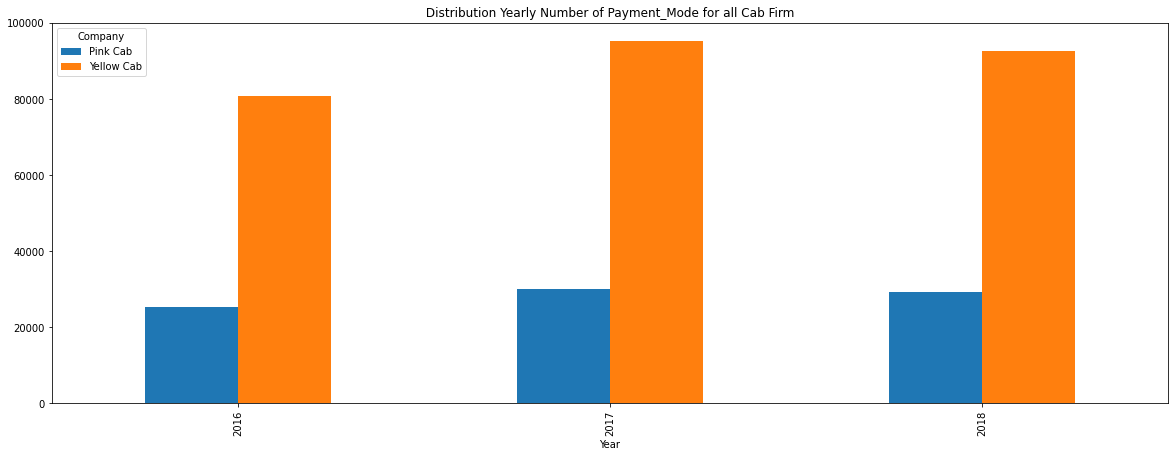

In [246]:
#plot
Yearly_Payment.plot(kind='bar',title=" Distribution Yearly Number of Payment_Mode for all Cab Firm ",figsize=(20,7));

<b> So, In Yearly Number of Payment_Mode for all Cab Firm, the visualizations shows the Yellow Cab Firm have higher than Yellow Cab Firm  </b>

#### Yearly Number of Gender for all Cab Firm

In [247]:
Yearly_Gender = Master_df.groupby(["Gender", "Company","Year"])\
.count()["Customer ID"]\
.unstack(["Gender"])
Yearly_Gender.head()

Gender           Female   Male
Company    Year               
Pink Cab   2016   10961  14317
           2017   13415  16783
           2018   13098  16119
Yellow Cab 2016   33321  47417
           2017   40615  54687

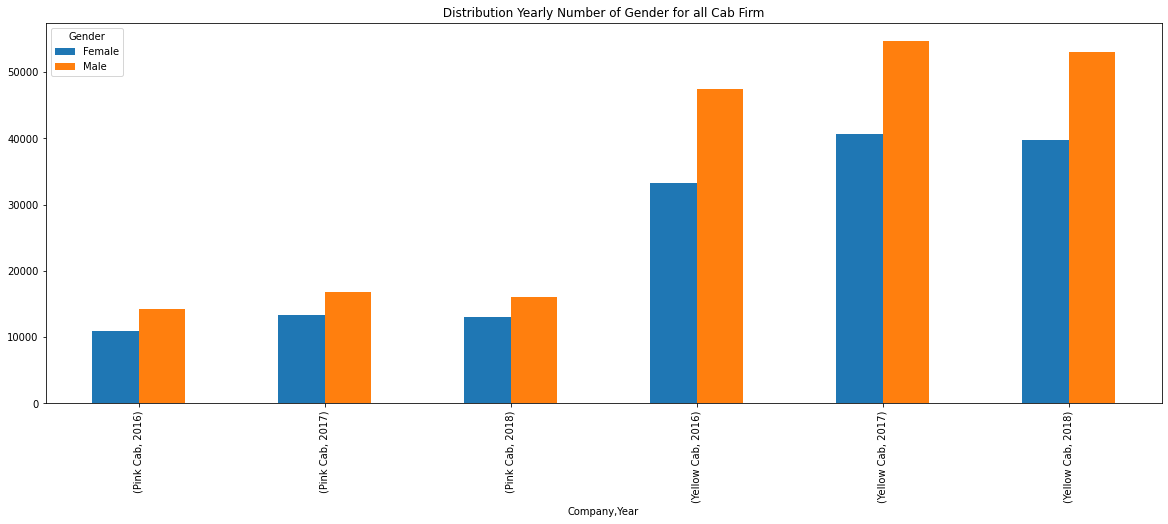

In [248]:
#Plot
Yearly_Gender.plot(kind='bar',title=" Distribution Yearly Number of Gender for all Cab Firm ",figsize=(20,7));

<b> So, In Yearly Number of Gender for all Cab Firm, the visualizations shows the Yellow Cab Firm have higher than Yellow Cab Firm  </b>

### Master DataSet

In [249]:
Master_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Population,Users,Profit_of_Trip
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,7,814885,24701,57.3150
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,20,814885,24701,281.2772
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,22,814885,24701,194.6480
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,5,814885,24701,23.6660
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,20,814885,24701,253.9808


In [250]:
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353434 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      353434 non-null  int64         
 1   Customer ID         353434 non-null  int64         
 2   Payment_Mode        353434 non-null  category      
 3   Gender              353434 non-null  category      
 4   Age                 353434 non-null  int64         
 5   Income (USD/Month)  353434 non-null  int64         
 6   Date of Travel      353434 non-null  datetime64[ns]
 7   Company             353434 non-null  category      
 8   City                353434 non-null  category      
 9   KM Travelled        353434 non-null  float64       
 10  Price Charged       353434 non-null  float64       
 11  Cost of Trip        353434 non-null  float64       
 12  Year                353434 non-null  int64         
 13  Month               353434 no

In [251]:
Master_df.shape

(353434, 18)

## Sammary

- After all these anaylsis and visualizations, we can answer the previous comparsion questions
- Compare Yellow Cab and Pink Cab from Different Aspects:
<br>
 1. Compare between Yellow Cab and pink Cab by performance.<br>
      The Yellow Cab firm higher perormance than Yellow Cab firm
      <br>
  2. Which Cab firm profit is increased?<br>
    From Visulizations Profit Anaylsis, the Yellow Cab Firm higher than Pink Cab Firm.
    <br>
  2. Which Cab firm is favored by customers?<br>
        From Visulizations User Anaylsis, and Yearly Users Analysis for each Cab firm, and  Yearly Number of Gender for all Cab Firm<br>         the Yellow Cab Firm favores from Customers Either Females or Males than Pink Cab Firm.
          <br>

  3. Which Cab firm in most cities?<br>
    From the transaction analysis visualization above, Yellow Cap Firm has high coverage in both large and small cities, with the most popular being (New York, New York, Boston, Massachusetts, Chicago, Illinois, and Los Angeles, California). Also, according to the city's analysis, most users are yellow.
    <br>

    
  4. Which Cab firm have bigger market share?<br>
    From all the above visualizations and the answers of the comparsion's questions we understand that Yellow Cap Frim is bigger than Pink Cap Firm in market Share.
    <br>


## Username Student: alassirifatima@gmail.com
## Fatimah Asiri
#Done 